## Predicting employees that will leave the company

This project we are exploring the data of employees of a company given to us by their Human Resources Deparment, our Job is to identify the patterns of this data and predict given some certain conditions if an employee would leave or stay in the company
___

* Type of Machine Learning Method
    * Supervised Learning
        * Classification
            * Decision Tree 
                * Accuracy: 98.07 %
                * Precision: 95.22 %
                * Recall: 96.74 %
___
* Dataset Used
     * Data was scraped from [Kaggle](https://www.kaggle.com/datasets/giripujar/hr-analytics)
___

### Steps to Solve Problem
* Import Dataset
* Exploratory Data Analysis
* Feature Engineering
    * Data Cleaning
    * Missing Data Imputation
    * Feature Encoding
* Model Build
    * Train / Test Data split
    * Model Initiation and Fitting
    * Test predictions
* Model Perfromance
    * MAE
    * R^2 score
    * Case Prediction
        

Import Starter Libraries 

In [40]:
#Starter Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("darkgrid")
sns.set_palette("rainbow")

### Exploratory Data Analysis

In [41]:
hr = pd.read_csv("HR_comma_sep.csv")

In [42]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Basic Info of Data

In [44]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Feature Engineering

What are the ratings of the employee's satisfaction level

* Excellent - 70%
* Really Good - 60%
* Good - 50%
* Poor - 40%
* Bad - Less than 40%

Let us define a function that would map each of the Satisficationary levels to the criteria we stated above

In [45]:
def rating(serie):
    ratings = {}
    for a in serie:
        if a >= 0.7:
            ratings[a] = "Excellent"
        elif (a >= 0.6) and (a < 0.7):
            ratings[a] = "Very Good"
        elif (a >= 0.5) and (a < 0.6):
            ratings[a] = "Average"
        elif (a >= 0.4) and (a < 0.5):
            ratings[a] = "Poor"
        else:
            ratings[a] = "Bad"
    return ratings

In [46]:
ratings = rating(hr["satisfaction_level"])
hr["ratings"] = hr["satisfaction_level"].map(ratings)

A lot of people actually rated their comfort at the company well

In [47]:
hr["ratings"].value_counts(normalize=True)*100

Excellent    43.356224
Bad          19.434629
Very Good    13.067538
Average      13.020868
Poor         11.120741
Name: ratings, dtype: float64

### Model Training

Okay let us get to a more interesting part of our project predicting if an employee would stay or leave based on our features

In [48]:
#Mapping sales
salary_code = {"low" : 1, "medium": 2, "high": 3}
hr["salary_code"] = hr["salary"].map(salary_code)

#### Train and Test Split

we would use 70/30 train-test

In [49]:
X = hr.drop(["Department","salary","ratings", "left"], axis=1)
y = hr["left"]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model = DecisionTreeClassifier()

In [55]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
predictions = model.predict(X_test)

###  Model Evaluation and Performance

In [57]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [58]:
print(f"Accuracy: {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"Precision: {precision_score(y_test, predictions) * 100:.2f} %")
print(f"Recall: {recall_score(y_test, predictions) * 100:.2f} %")

Accuracy: 98.07 %
Precision: 95.22 %
Recall: 96.74 %


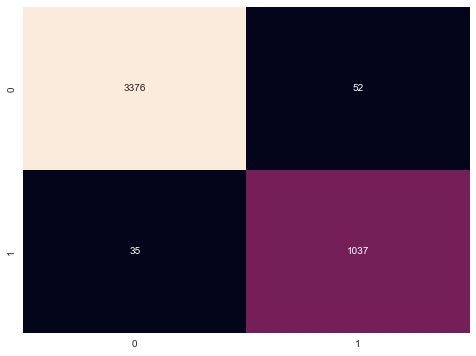

In [59]:
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False, fmt="d");